In [1]:
import networkx as nx

import seaborn as sn
import matplotlib.pyplot as plt
sn.set_theme(style="whitegrid")


In [2]:
from utils.hierarchical_graphs import TreelikeHierarchicalGraph, SimpleHierarchicalGraph

# Motivation:

* Some of the hierarchical networks show similar switchover phenomenon like the very geometrical GIRG models: the centrum never wins
* our real-world networks has some hierarchical structure
* from a mathamatical point of view it may be easier to handle 

# 1. Treelike-hierarchical graphs

### Generation:
* extend leaves by replacing them with a given subgraph ($H_0$):
* $(G_0=(V=\{0\}, E=\{\}), V_{new}=\{0\})$  
* $(G_k, V^k_{new})$ ==> $(G_{k+1} = \{ \text{replace } V^k_{new} \text{ with } H_0 \}, V^{k+1}_{new}=V_{k+1} \setminus V_{k})$
* $H_0$ can be:
    * star (thus we get a tree)
    * clique
    * star+cycle in the leaves

graph size:  341


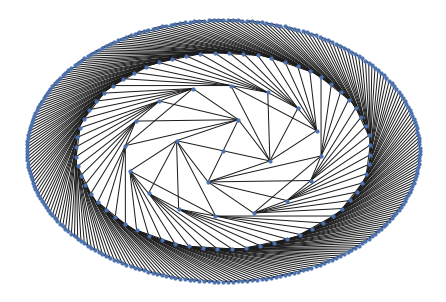

In [3]:
obj = TreelikeHierarchicalGraph(4, head=None, k=4, mode="cycle")
graph,shells = obj.graph, obj.shells

print("graph size: ", len(graph))

pos = nx.shell_layout(graph, shells)
nx.draw(graph, pos = pos, node_size=10, node_color='b')
plt.show()

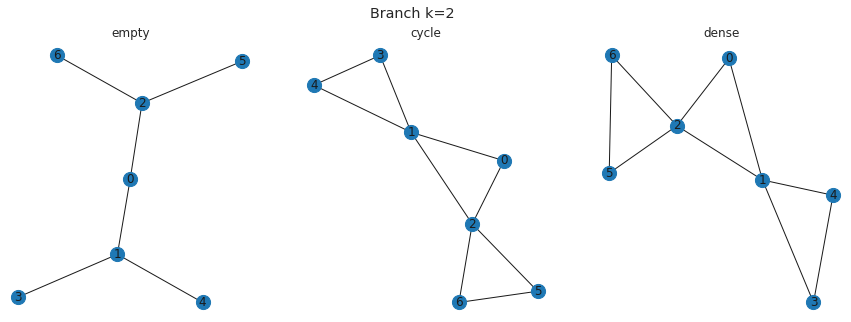

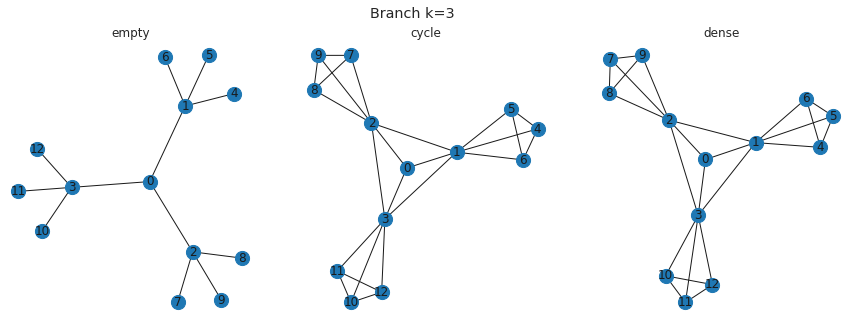

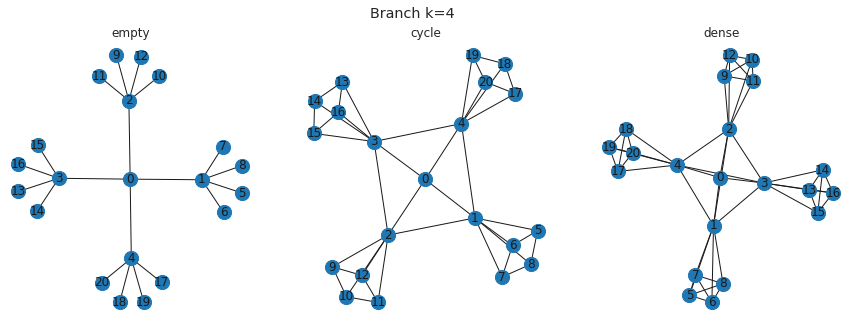

In [4]:
# Iteration = 2
for k in range(2,5):
    fig,axs = plt.subplots(1,3, figsize=(15,5))
    for i,mode in enumerate(["empty", "cycle", "dense"]):
        obj = TreelikeHierarchicalGraph(2, head=None, k=k, mode=mode)
        nx.draw(obj.graph, node_size=200, with_labels=True, ax=axs[i])
        axs[i].set_title(mode)
    fig.suptitle("Branch k={}".format(k))
    plt.show()

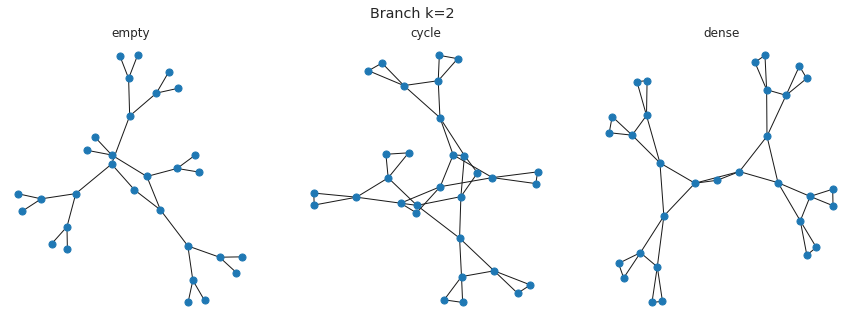

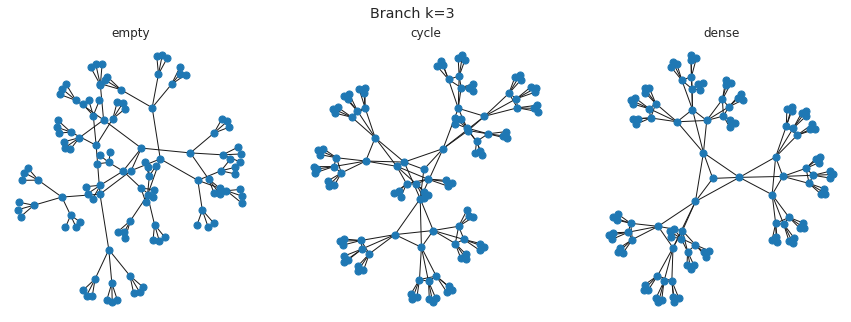

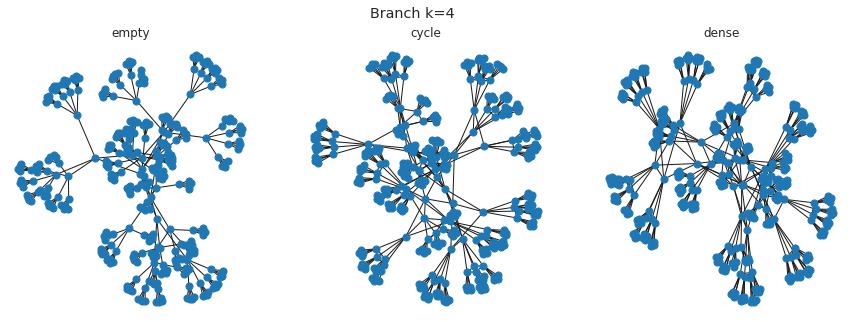

In [5]:
# Iteration = 4
for k in range(2,5):
    fig,axs = plt.subplots(1,3, figsize=(15,5))
    for i,mode in enumerate(["empty", "cycle", "dense"]):
        obj = TreelikeHierarchicalGraph(4, head=None, k=k, mode=mode)
        nx.draw(obj.graph, node_size=50, with_labels=False, ax=axs[i])
        axs[i].set_title(mode)
    fig.suptitle("Branch k={}".format(k))
    plt.show()

### 1.1 Degree distribution
* almost regular (except $V_{new}$)

In [6]:
# Iteration = 4
#for k in range(2,5):
#    fig,axs = plt.subplots(1,3, figsize=(15,5))
#    for i,mode in enumerate(["empty", "cycle", "dense"]):
#        obj = TreelikeHierarchicalGraph(7, head=None, k=k, mode=mode)
#        axs[i].hist(dict(nx.degree(obj.graph)).values(), bins=30)
#        axs[i].set_title(mode+"len graph: {}".format(len(obj.graph)))
#    fig.suptitle("Branch k={}".format(k))
#    plt.show()

### 1.2 Graph sizes

In [7]:
for k in range(2,5):
    print("Graph sizes for k={}: ".format(k))
    for i in range(1,11):
        obj = TreelikeHierarchicalGraph(i, head=None, k=k, mode="empty")
        graph,shells = obj.graph, obj.shells
        print("Iter =", i,":", len(graph))

Graph sizes for k=2: 
Iter = 1 : 3
Iter = 2 : 7
Iter = 3 : 15
Iter = 4 : 31
Iter = 5 : 63
Iter = 6 : 127
Iter = 7 : 255
Iter = 8 : 511
Iter = 9 : 1023
Iter = 10 : 2047
Graph sizes for k=3: 
Iter = 1 : 4
Iter = 2 : 13
Iter = 3 : 40
Iter = 4 : 121
Iter = 5 : 364
Iter = 6 : 1093
Iter = 7 : 3280
Iter = 8 : 9841
Iter = 9 : 29524
Iter = 10 : 88573
Graph sizes for k=4: 
Iter = 1 : 5
Iter = 2 : 21
Iter = 3 : 85
Iter = 4 : 341
Iter = 5 : 1365
Iter = 6 : 5461
Iter = 7 : 21845
Iter = 8 : 87381
Iter = 9 : 349525
Iter = 10 : 1398101


### 1.3 Switchover

In [8]:
import numpy as np
import pandas as pd
from utils.params import init_graph, get_centrum
from scripts.GPU_percolation_script import run_nets2
from utils.ecl_utils import get_graphstream



In [9]:
inp_args = {
    "--seed":0,
    "--mode":"simulation",
    #"--verbose":False,
    "--sim_num":2000,
    "log_folder":"data"
}


def run_percolation(graph, centrum, ss, ps):
    inp_args["--s_nonlin"] = str(len(ss))+" "+" ".join([str(s) for s in ss])
    print("Graph size: ", len(graph))
    nx.set_edge_attributes(graph, 1,"weight")
    g_stream = get_graphstream(graph, centrum, {"verbose":False})
    run_nets2(inp_args, g_stream, ps)
    
def plot_percolation(ss, title):
    df = pd.read_csv("data/grid_median_all_-1_-1.csv")

    plt.figure(figsize=(15,10))

    for s in ss:
        plt.plot(df[df["s"]==s]["p"], df[df["s"]==s]["rat0"], label=s)

    plt.xlabel("p")
    plt.ylabel("Ratio")
    plt.legend()
    plt.title(title)

In [10]:
obj = TreelikeHierarchicalGraph(11, head=None, k=k, mode="empty")
nx.shortest_path_length(obj.graph,0,1)

1

In [11]:
#for i in range(127):
#    print(nx.shortest_path_length(obj.graph,0,i))

Graph size:  4095
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1381444[ms]
>>> Reading input time = 109898[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1406679[ms]
>>> Reading input time = 59821[ms]
[Python] Error: None


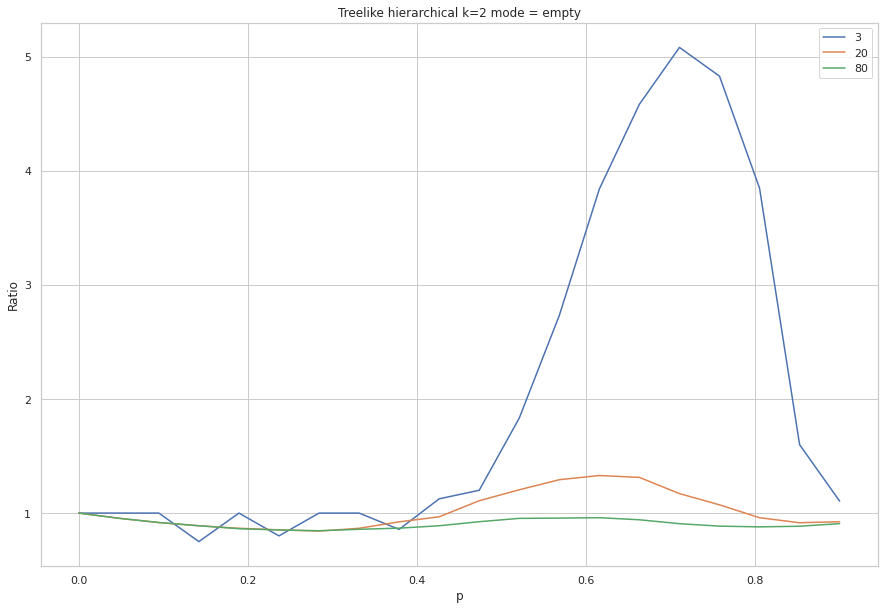

Graph size:  4095
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1400694[ms]
>>> Reading input time = 62622[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1435010[ms]
>>> Reading input time = 62219[ms]
[Python] Error: None


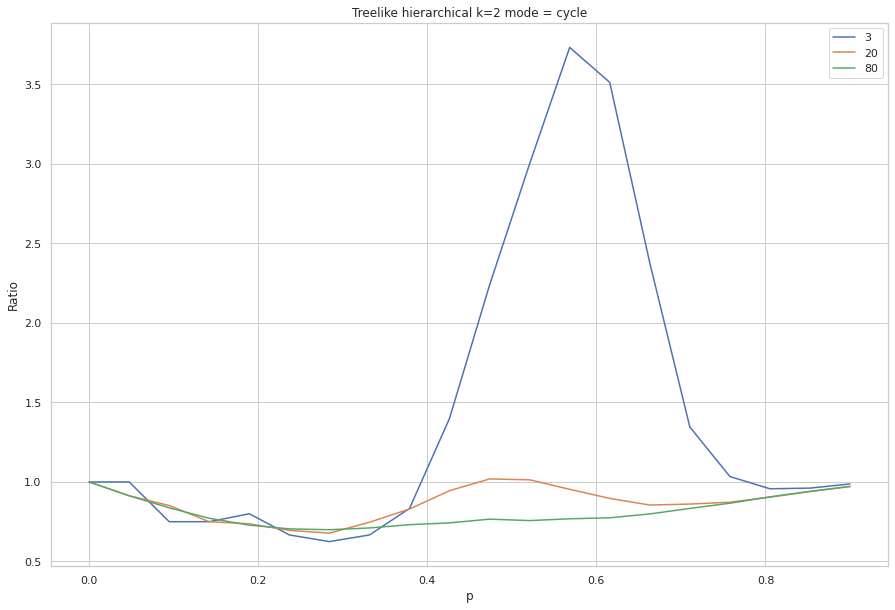

Graph size:  4095
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1377904[ms]
>>> Reading input time = 63018[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1421616[ms]
>>> Reading input time = 63024[ms]
[Python] Error: None


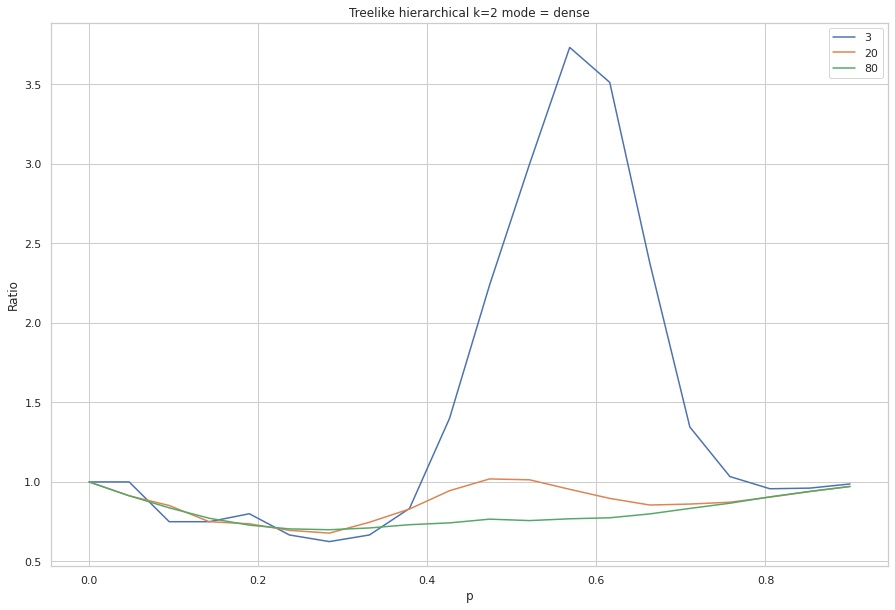

In [12]:
k=2
inp_args["--sim_num"]=1000

ss = [3,20,80]

for i,mode in enumerate(["empty", "cycle", "dense"]):
    obj = TreelikeHierarchicalGraph(11, head=None, k=k, mode=mode)
    centrum = list(range(len(obj.graph)))
    run_percolation(obj.graph, centrum, ss, np.linspace(0,0.9, 20))
    plot_percolation(ss, "Treelike hierarchical k={} mode = {}".format(k, mode))
    plt.show()

Graph size:  3280
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1384664[ms]
>>> Reading input time = 57210[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1382197[ms]
>>> Reading input time = 57734[ms]
[Python] Error: None


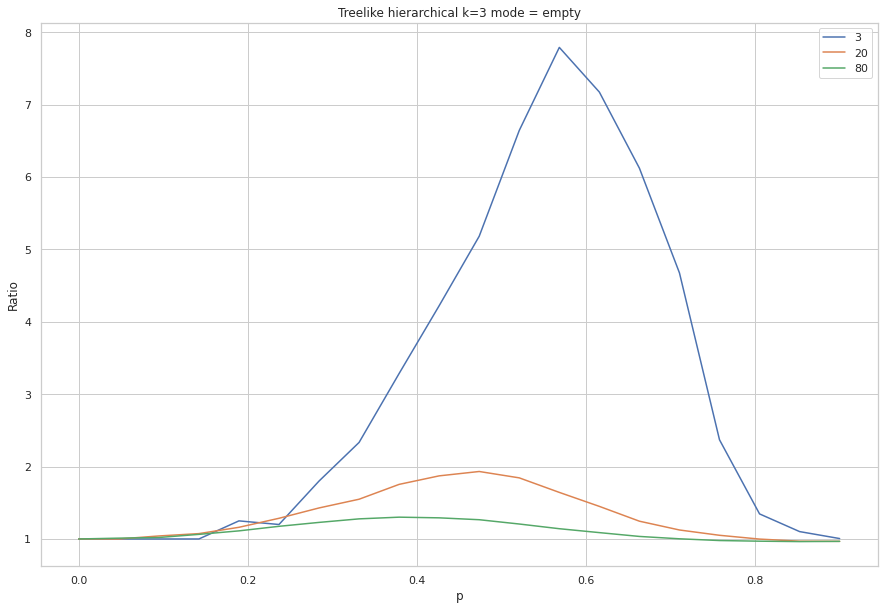

Graph size:  3280
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1375573[ms]
>>> Reading input time = 63389[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1360517[ms]
>>> Reading input time = 62074[ms]
[Python] Error: None


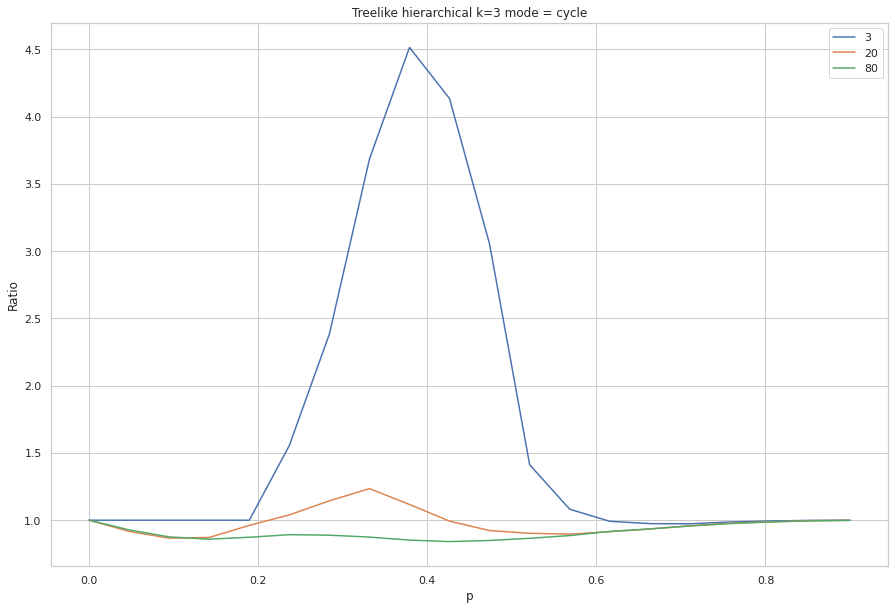

Graph size:  3280
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1387372[ms]
>>> Reading input time = 63053[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1371581[ms]
>>> Reading input time = 62205[ms]
[Python] Error: None


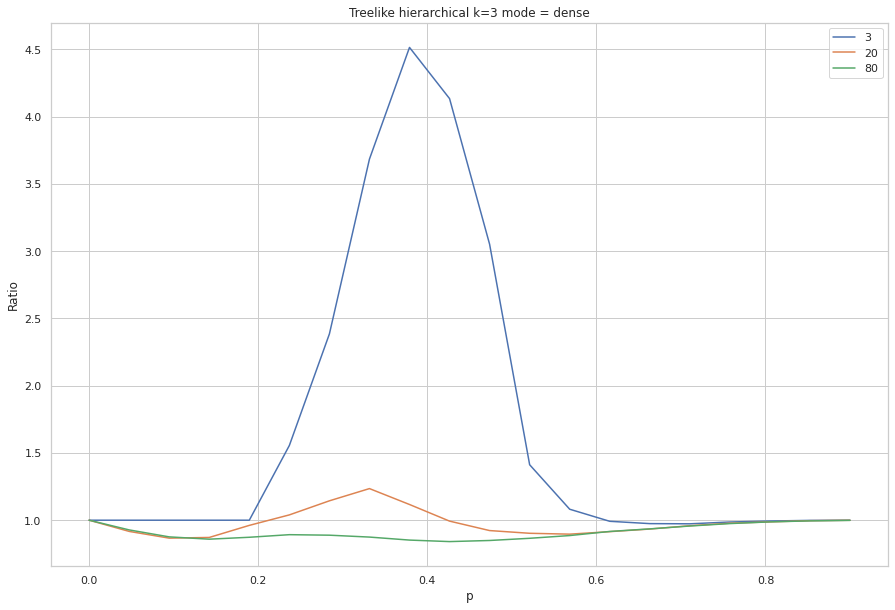

In [13]:
k=3
inp_args["--sim_num"]=1000

centrum = list(range(121))
ss = [3,20,80]

for i,mode in enumerate(["empty", "cycle", "dense"]):
    obj = TreelikeHierarchicalGraph(7, head=None, k=k, mode=mode)
    centrum = list(range(len(obj.graph)))
    run_percolation(obj.graph, centrum, ss, np.linspace(0,0.9, 20))
    plot_percolation(ss, "Treelike hierarchical k={} mode = {}".format(k, mode))
    plt.show()

Graph size:  5461
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1413619[ms]
>>> Reading input time = 74978[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1393233[ms]
>>> Reading input time = 74470[ms]
[Python] Error: None


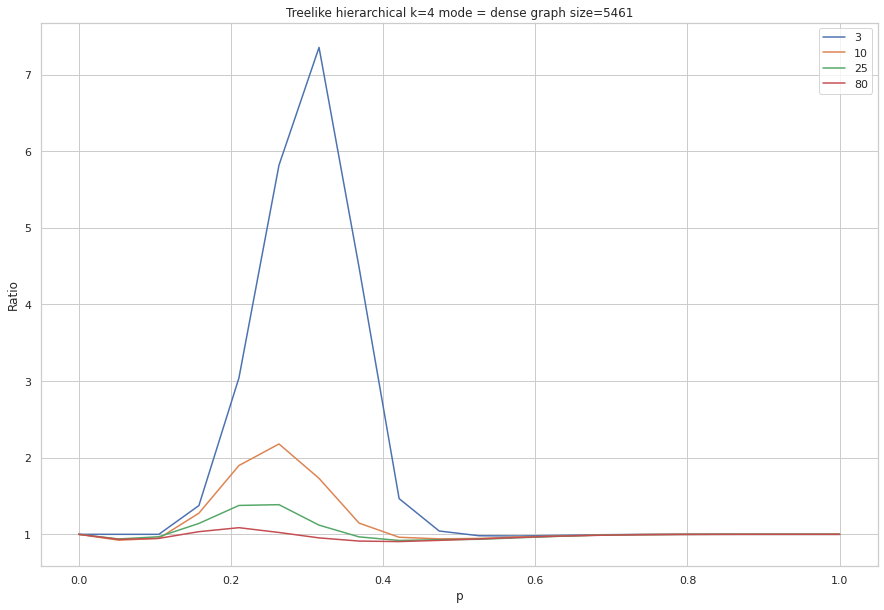

Graph size:  21845
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1368761[ms]
>>> Reading input time = 157514[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1370587[ms]
>>> Reading input time = 152347[ms]
[Python] Error: None


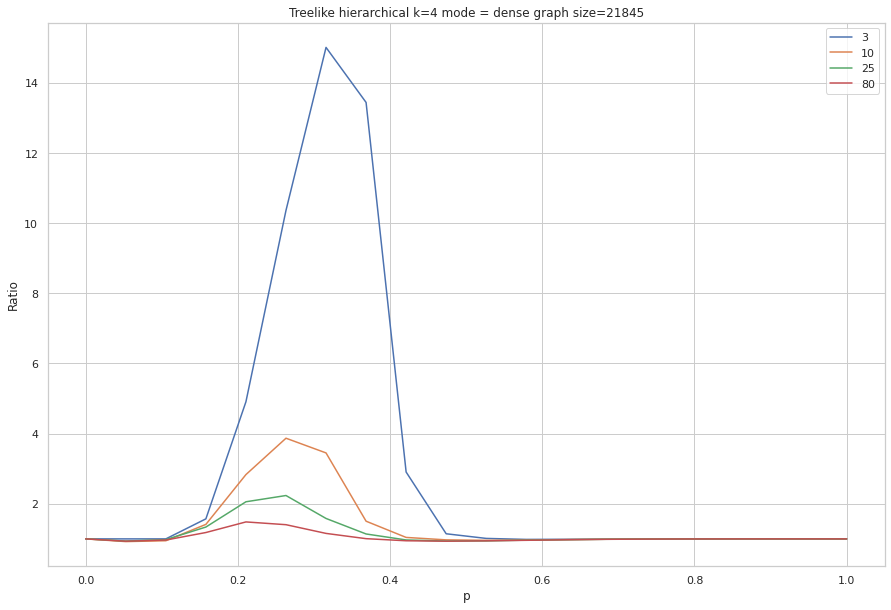

Graph size:  87381
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1382948[ms]
>>> Reading input time = 487519[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1382459[ms]
>>> Reading input time = 488054[ms]
[Python] Error: None


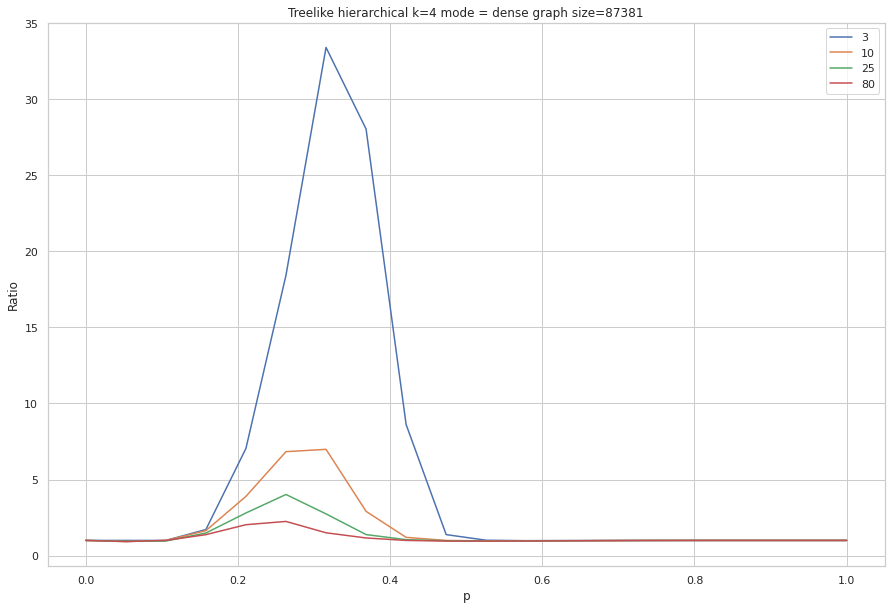

In [14]:
k=4
inp_args["--sim_num"]=1000

ss = [3,10,25,80]

for iter in range(6,9):
    for i,mode in enumerate(["dense"]):
        obj = TreelikeHierarchicalGraph(iter, head=None, k=k, mode=mode)
        centrum = list(range(len(obj.graph)))
        run_percolation(obj.graph, centrum, ss, np.linspace(0,1.0, 20))
        plot_percolation(ss, "Treelike hierarchical k={} mode = {} graph size={}".format(k, mode, len(obj.graph)))
        plt.show()

### Theoretical computations for tree

For a centrum node, whose parent is infected:

$centrumTotal=\sum_{k=1} p^k 2^k > 2p+4p^2+8p^3+16p^4$

$peripheryTotal=0.5*(p+2p^2+2p^3+4p^4+6p^5)$

In [1]:
def centrum(n, p, sharp = 10):
    mysum = 0.0
    for i in range(1,sharp):
        mysum += (p**i)*(2**i)
    return n*mysum

def periphery(n,p):
    s1 = 0.5*(p+2*p**2+2*p**3+4*p**4+6*p**5)
    s2 = 0.25*(3*p+2*p**2+4*p**3+5*p**4+11*p**5)
    s3 = 0.125*(3*p+6*p**2+4*p**3+8*p**4+10*p**5)
    
    return n*(s1+s2+s3)

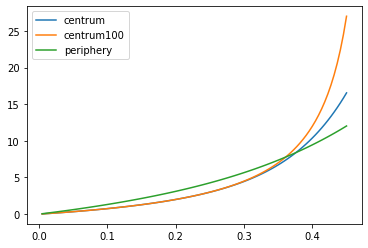

In [2]:
import numpy as np
import matplotlib.pyplot as plt
max_p = 0.45
ps = np.linspace(0,max_p,100)[1:]

C = [centrum(3,p) for p in ps]
C100 = [centrum(3,p, sharp=100) for p in ps]
P = [periphery(7,p) for p in ps]


plt.plot(ps, C, label="centrum")
plt.plot(ps, C100, label="centrum100")
plt.plot(ps, P, label="periphery")
plt.legend()
plt.show()


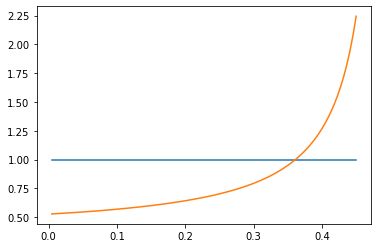

In [35]:
plt.plot(ps, [1 for p in ps])
plt.plot(ps, np.array(C100)/np.array(P))

### Dense head
* we connect each edge in the centrum with proability p=0.1

Graph size:  5461
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1380404[ms]
>>> Reading input time = 76715[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1393876[ms]
>>> Reading input time = 74830[ms]
[Python] Error: None


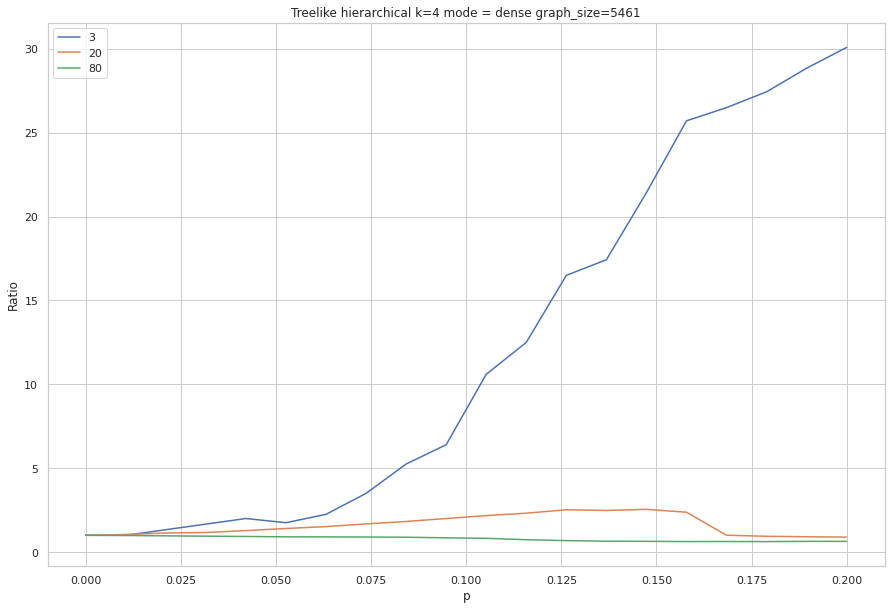

Graph size:  21845
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1419795[ms]
>>> Reading input time = 2384205[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1397931[ms]
>>> Reading input time = 2395378[ms]
[Python] Error: None


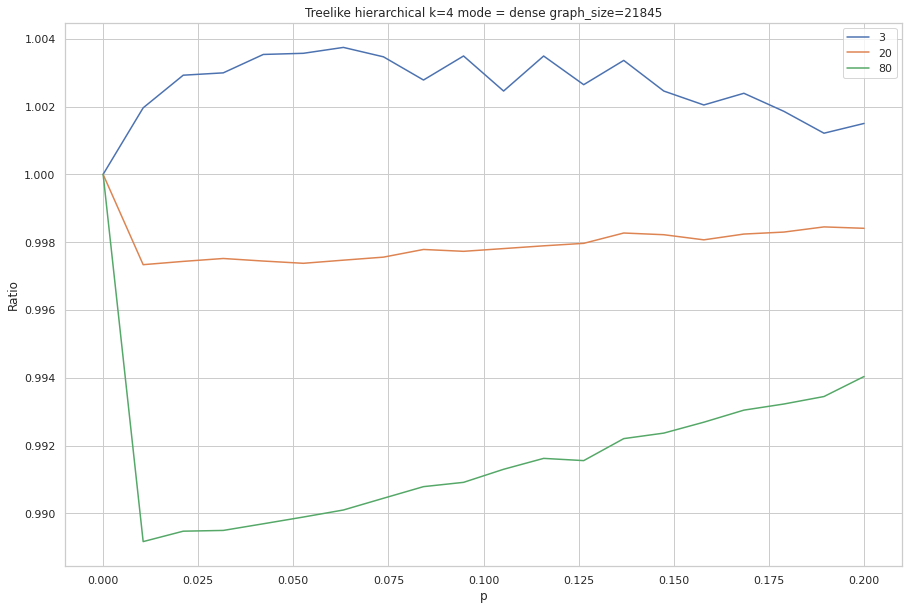

Graph size:  87381
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1377018[ms]
>>> Reading input time = 38914993[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1376158[ms]
>>> Reading input time = 42875480[ms]
[Python] Error: None


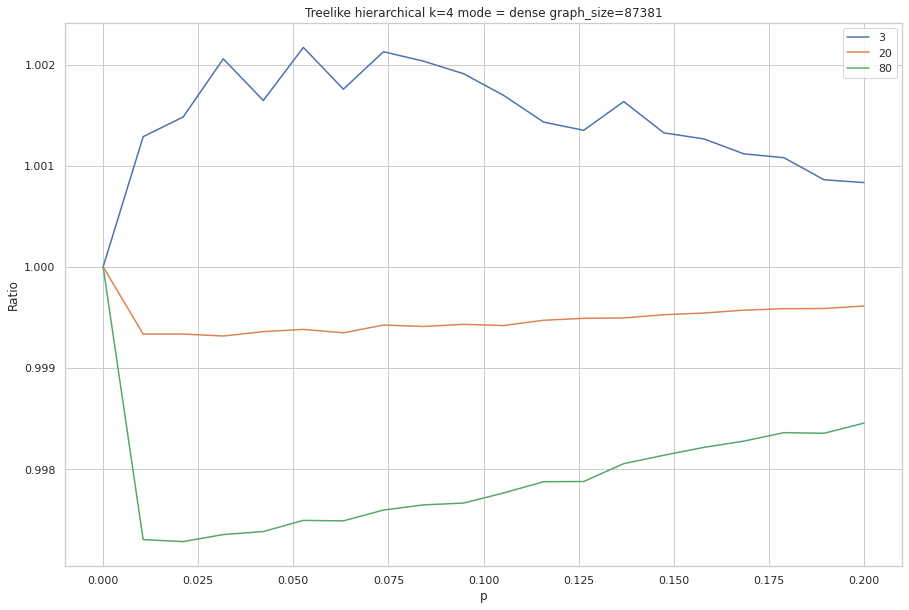

In [15]:
k=4
inp_args["--sim_num"]=1000

centrum = list(range(80))
ss = [3,20,80]


for iter in range(6,9):
    for i,mode in enumerate(["dense"]):
        obj = TreelikeHierarchicalGraph(iter, head={"p_centrum":0.1, "p_all":0.0, "n":len(centrum)}, k=k, mode=mode)
        centrum = list(range(len(obj.graph)))
        run_percolation(obj.graph, centrum, ss, np.linspace(0,0.2, 20))
        plot_percolation(ss, "Treelike hierarchical k={} mode = {} graph_size={}".format(k, mode, len(obj.graph)))
        plt.show()

# 2. Barabási-hierarchical graph

### 2.1 Degree ditribution
    * it has more healthy degree ditribution
    * it is powerlaw (???) https://arxiv.org/pdf/cond-mat/0206130.pdf
    * k = 4 is the classical one parameter

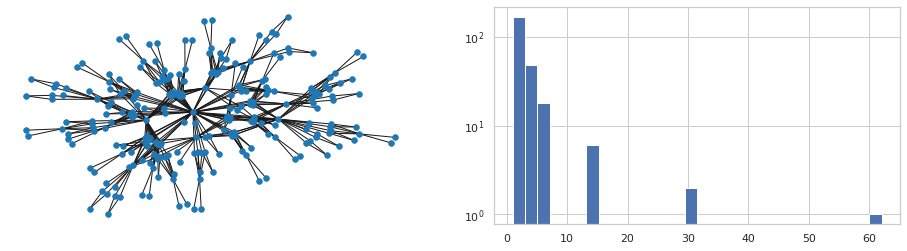

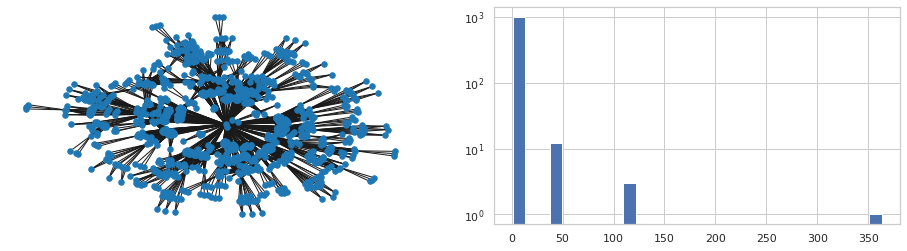

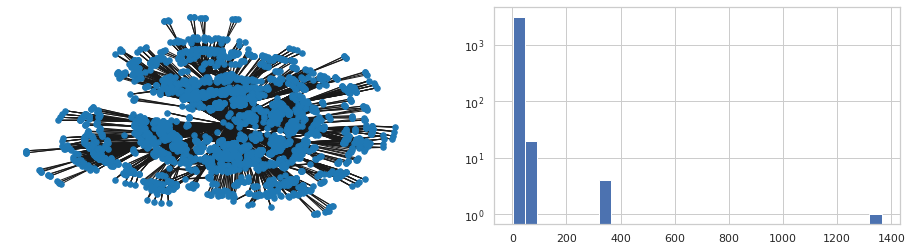

In [16]:
gen = SimpleHierarchicalGraph()

for k in range(3,6):
    graph, per = gen.get(depth = 5, k=k)
    fig,axs = plt.subplots(1,2, figsize=(16,4))
    nx.draw(graph, node_size=30, ax=axs[0])
    
    axs[1].hist(dict(nx.degree(graph)).values(), bins=30)
    axs[1].set_yscale('log')
    plt.show()

### 2.2 Switchover

Graph size:  2187
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1418061[ms]
>>> Reading input time = 58629[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1431317[ms]
>>> Reading input time = 57949[ms]
[Python] Error: None


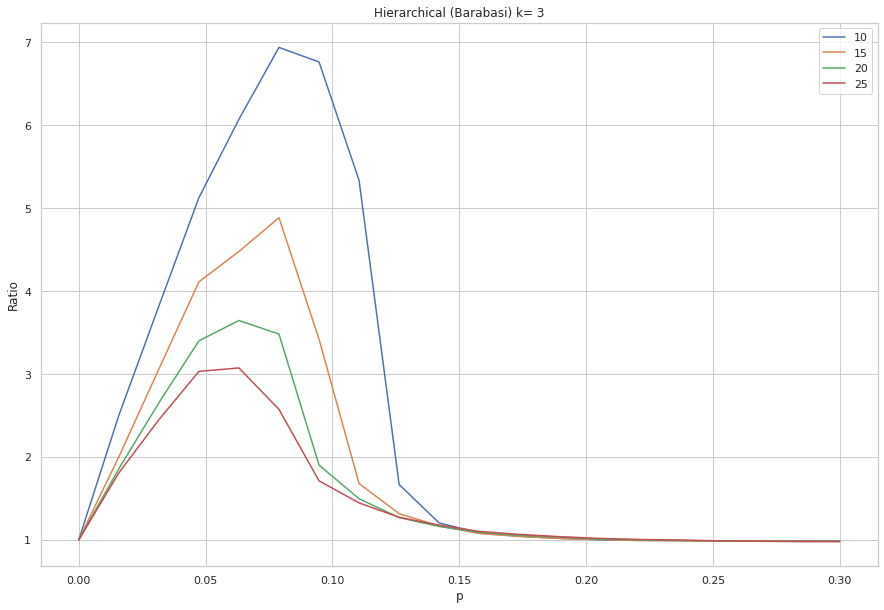

In [17]:
k = 3

graph, per = gen.get(depth = 7, k=k)


ss = [10,15, 20, 25]
inp_args["--sim_num"]=1000

degree = sorted(dict(nx.degree(graph)).items(), key = lambda l: l[1], reverse = True)
centrum = np.array(degree)[:,0]

run_percolation(graph, centrum, ss, np.linspace(0,0.3, 20))
plot_percolation(ss, "Hierarchical (Barabasi) k= {}".format(k))
plt.show()

Graph size:  16384
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1426333[ms]
>>> Reading input time = 129695[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1394513[ms]
>>> Reading input time = 130230[ms]
[Python] Error: None


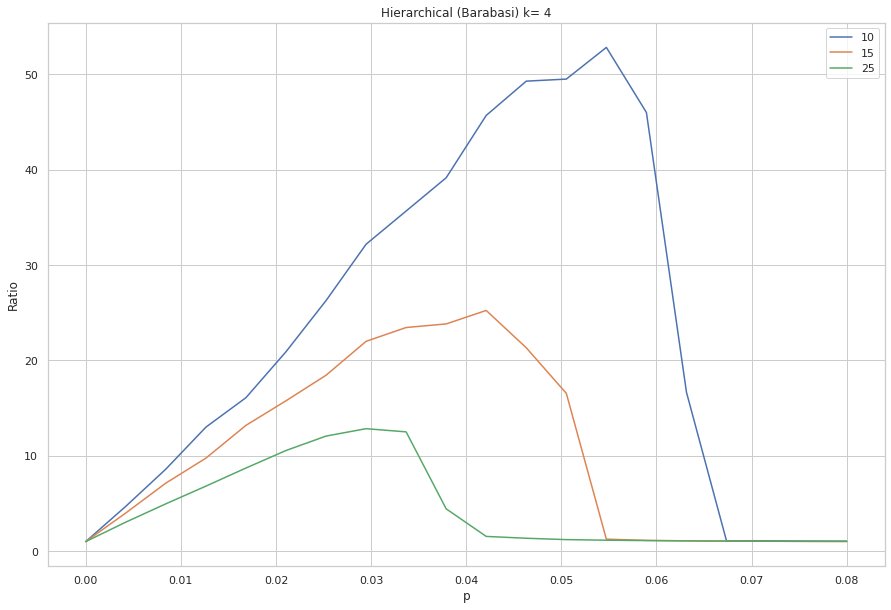

In [18]:
for k in [4]:
    graph, per = gen.get(depth = 7, k=k)

    ss = [10,15,25]
    inp_args["--sim_num"]=1000

    degree = sorted(dict(nx.degree(graph)).items(), key = lambda l: l[1], reverse = True)
    centrum = np.array(degree)[:,0]

    run_percolation(graph, centrum, ss, np.linspace(0,0.08, 20))
    plot_percolation(ss, "Hierarchical (Barabasi) k= {}".format(k))
    plt.show()

Graph size:  78125
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1448785[ms]
>>> Reading input time = 533082[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1417203[ms]
>>> Reading input time = 524674[ms]
[Python] Error: None


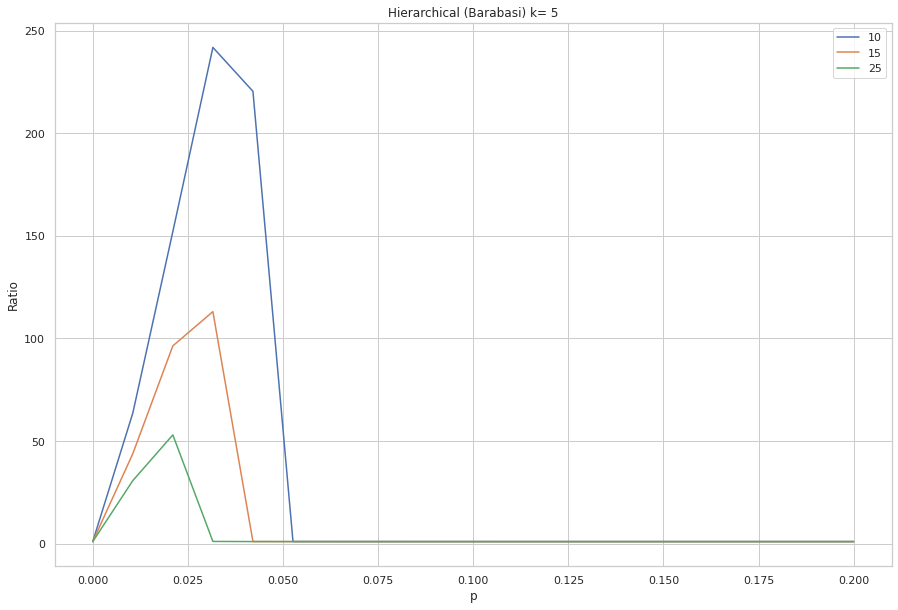

In [19]:
for k in [5]:
    graph, per = gen.get(depth = 7, k=k)

    ss = [10,15,25]
    inp_args["--sim_num"]=1000

    degree = sorted(dict(nx.degree(graph)).items(), key = lambda l: l[1], reverse = True)
    centrum = np.array(degree)[:,0]

    run_percolation(graph, centrum, ss, np.linspace(0,0.2, 20))
    plot_percolation(ss, "Hierarchical (Barabasi) k= {}".format(k))
    plt.show()

# 3. Barabási preferential attachment model

Graph size:  5000
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1427265[ms]
>>> Reading input time = 75597[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1378102[ms]
>>> Reading input time = 77410[ms]
[Python] Error: None


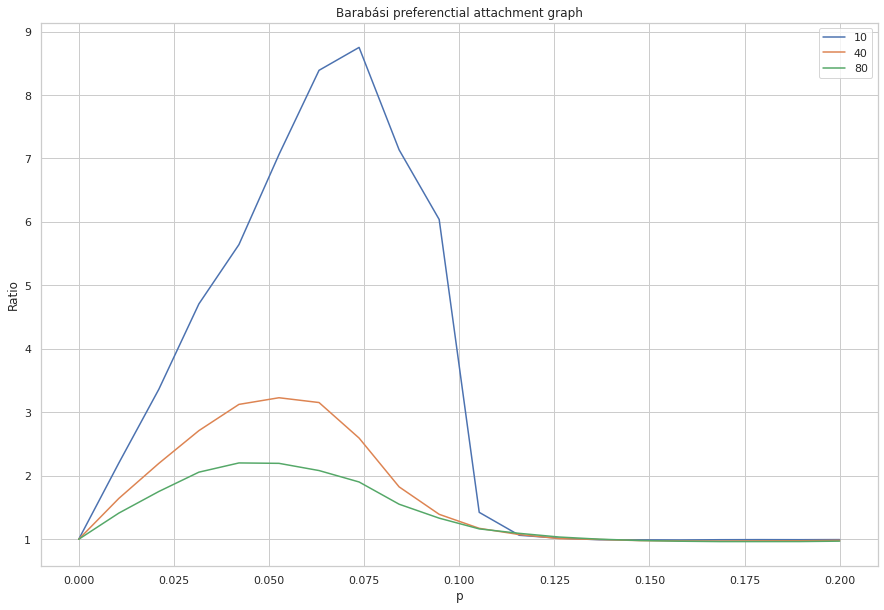

Graph size:  5000
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1444170[ms]
>>> Reading input time = 83126[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1348617[ms]
>>> Reading input time = 83269[ms]
[Python] Error: None


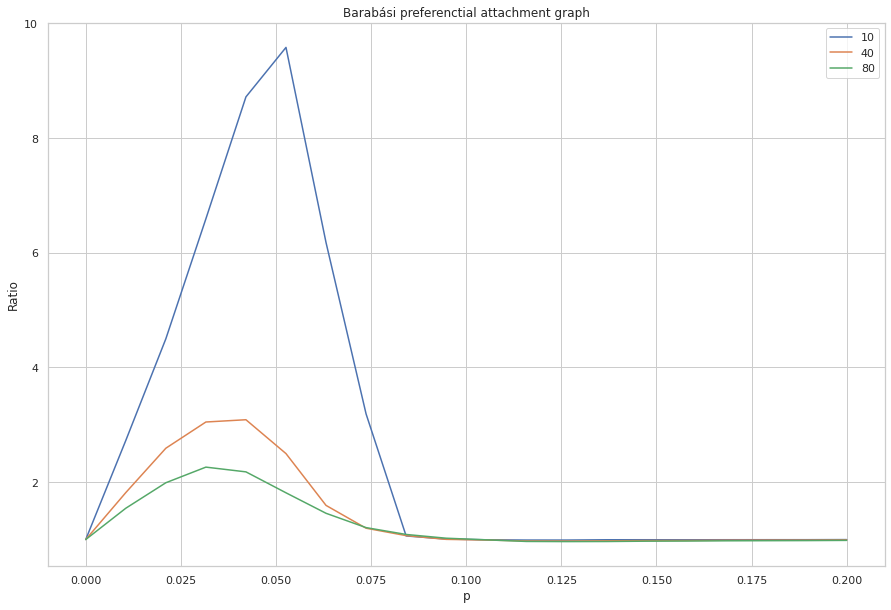

Graph size:  5000
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1424108[ms]
>>> Reading input time = 90625[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1385761[ms]
>>> Reading input time = 90571[ms]
[Python] Error: None


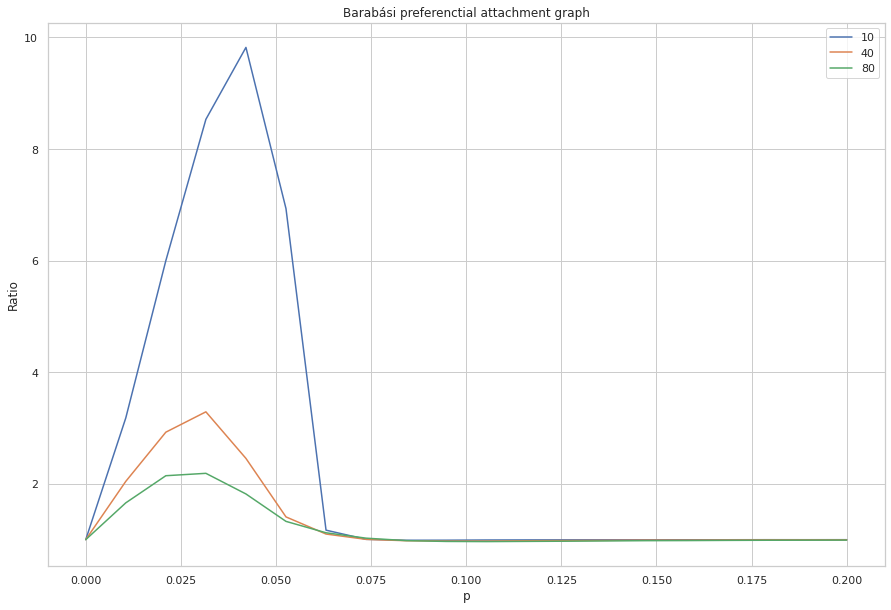

Graph size:  5000
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1426177[ms]
>>> Reading input time = 101407[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1429965[ms]
>>> Reading input time = 104182[ms]
[Python] Error: None


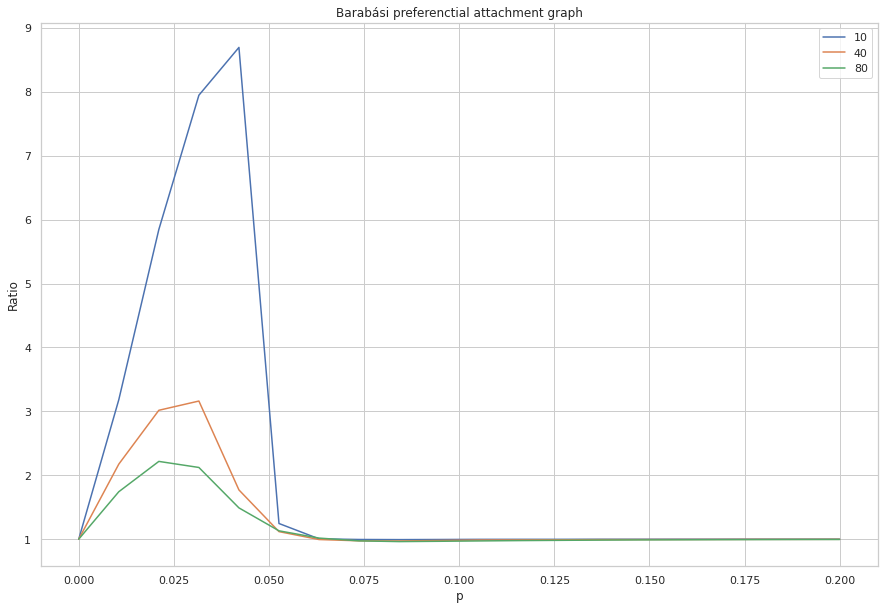

Graph size:  5000
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1422679[ms]
>>> Reading input time = 106006[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1394903[ms]
>>> Reading input time = 105641[ms]
[Python] Error: None


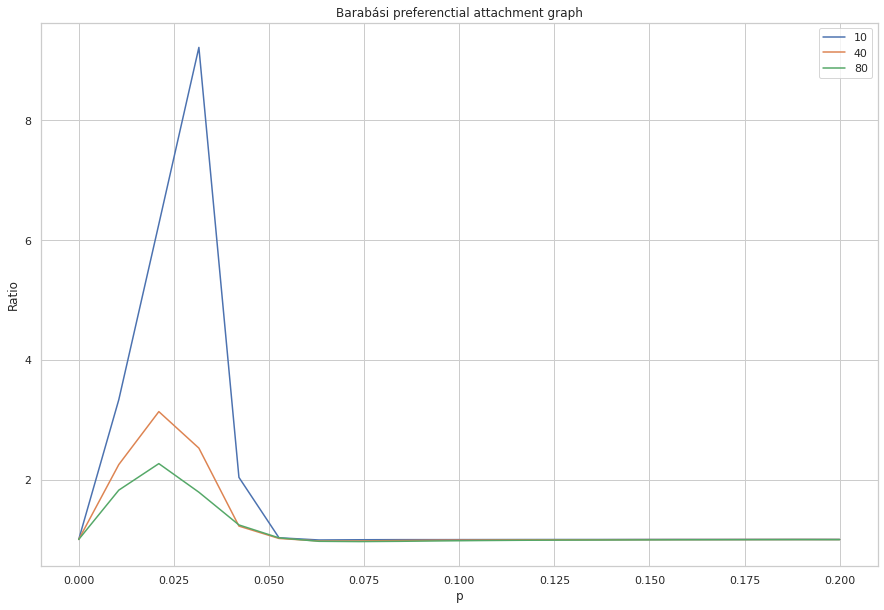

Graph size:  5000
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1431873[ms]
>>> Reading input time = 113211[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1388988[ms]
>>> Reading input time = 113050[ms]
[Python] Error: None


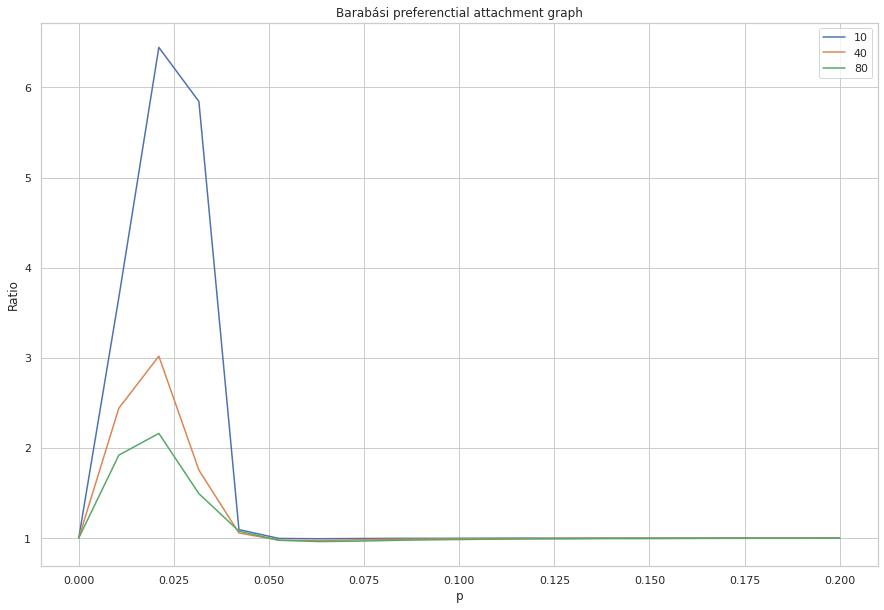

Graph size:  5000
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1450539[ms]
>>> Reading input time = 120896[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 300
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 2148980[ms]
>>> Reading input time = 134377[ms]
[Python] Error: None


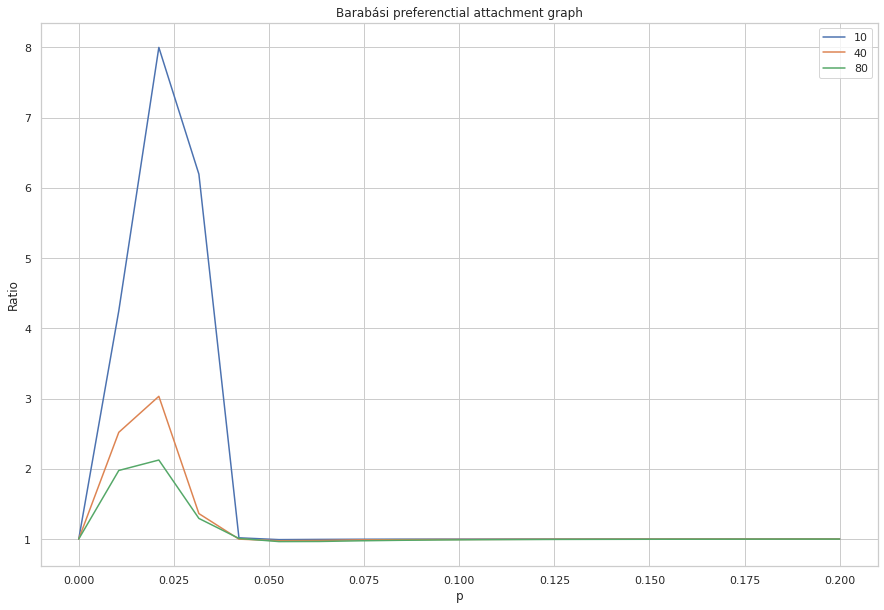

In [20]:
ss = [10,40,80]

inp_args["--sim_num"]=300
for i in range(3,10):
    graph = nx.barabasi_albert_graph(5000,i)
    degree = sorted(dict(nx.degree(graph)).items(), key = lambda l: l[1], reverse = True)
    centrum = np.array(degree)[:,0]

    run_percolation(graph, centrum, ss, np.linspace(0,0.2, 20))
    plot_percolation(ss, "Barabási preferenctial attachment graph")
    plt.show()

# 4. GIRG

In [21]:
from utils.params import GIRG_args1,GIRG_args2,GIRG_args3,GIRG_args4, get_moving

Graph size:  1755
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1382391[ms]
>>> Reading input time = 55898[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1391107[ms]
>>> Reading input time = 56556[ms]
[Python] Error: None


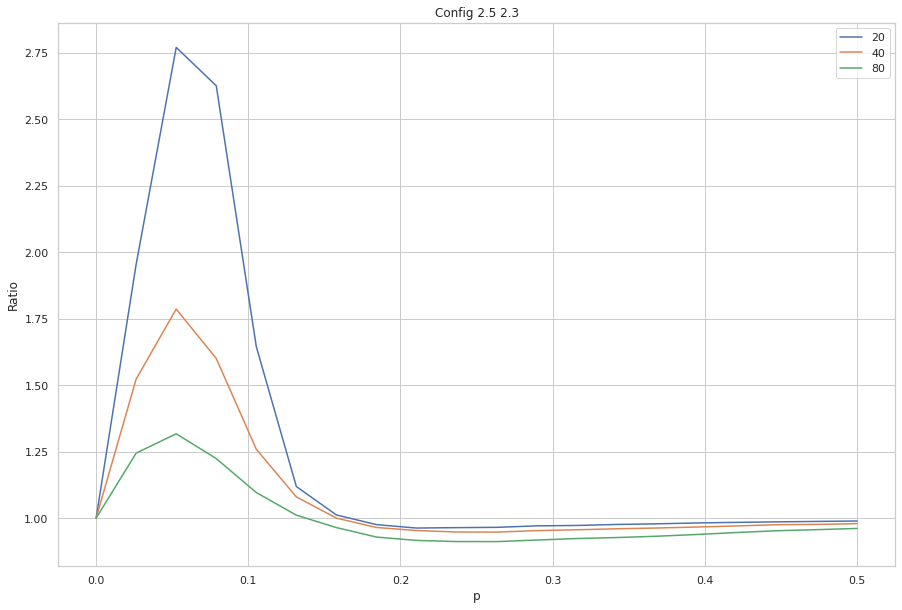

Graph size:  2094
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1382194[ms]
>>> Reading input time = 56207[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1414755[ms]
>>> Reading input time = 56140[ms]
[Python] Error: None


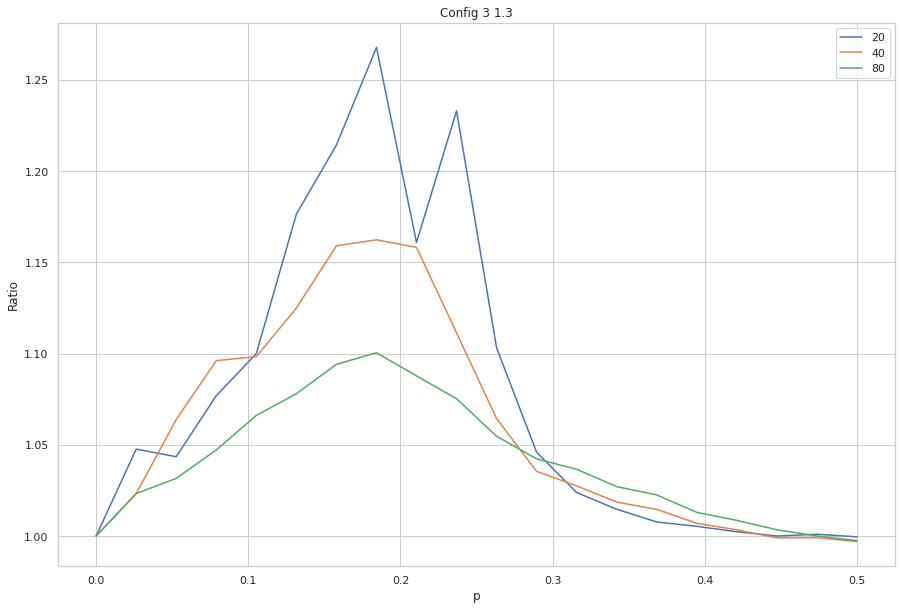

Graph size:  2175
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1431028[ms]
>>> Reading input time = 56064[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1469151[ms]
>>> Reading input time = 56415[ms]
[Python] Error: None


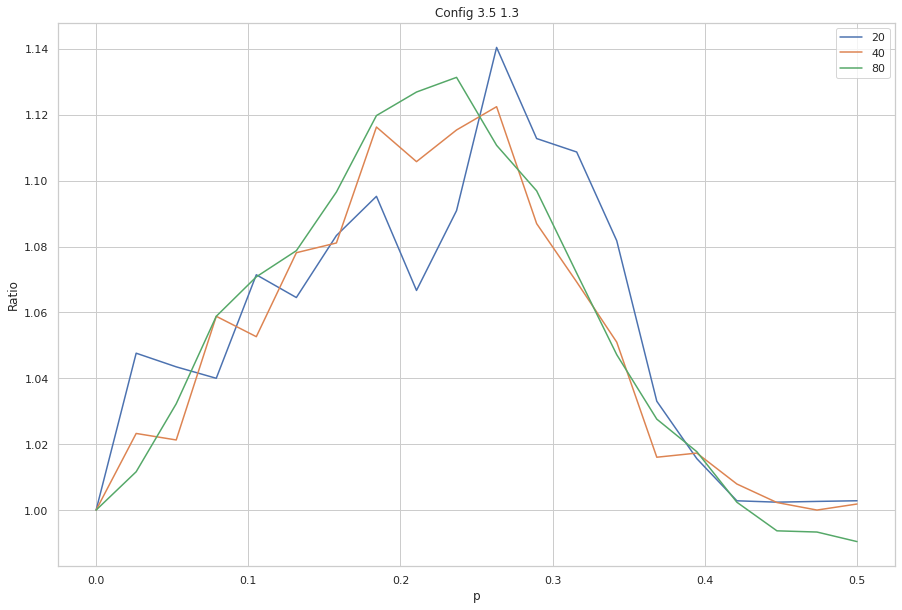

Graph size:  1254
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1447573[ms]
>>> Reading input time = 54302[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1441971[ms]
>>> Reading input time = 54257[ms]
[Python] Error: None


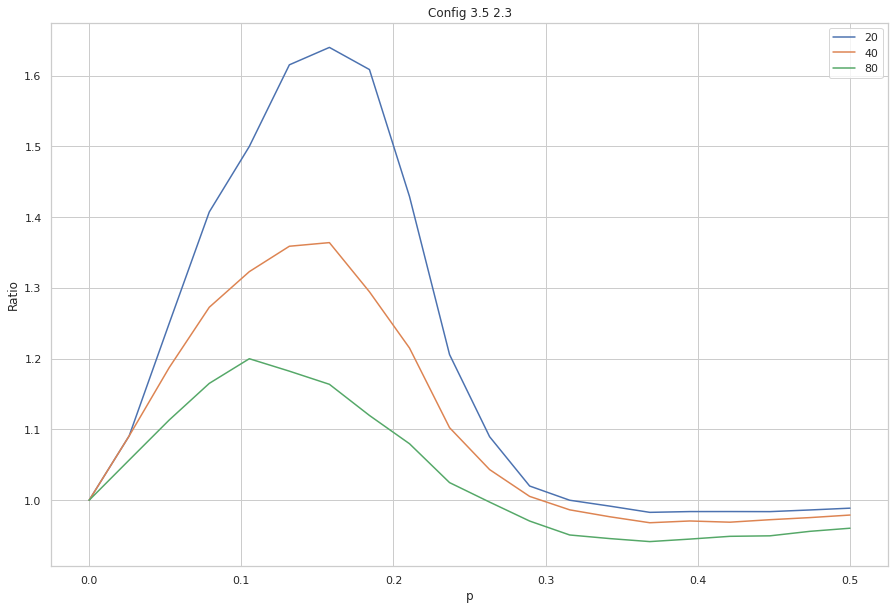

Graph size:  1755
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1372037[ms]
>>> Reading input time = 56588[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1445804[ms]
>>> Reading input time = 55910[ms]
[Python] Error: None


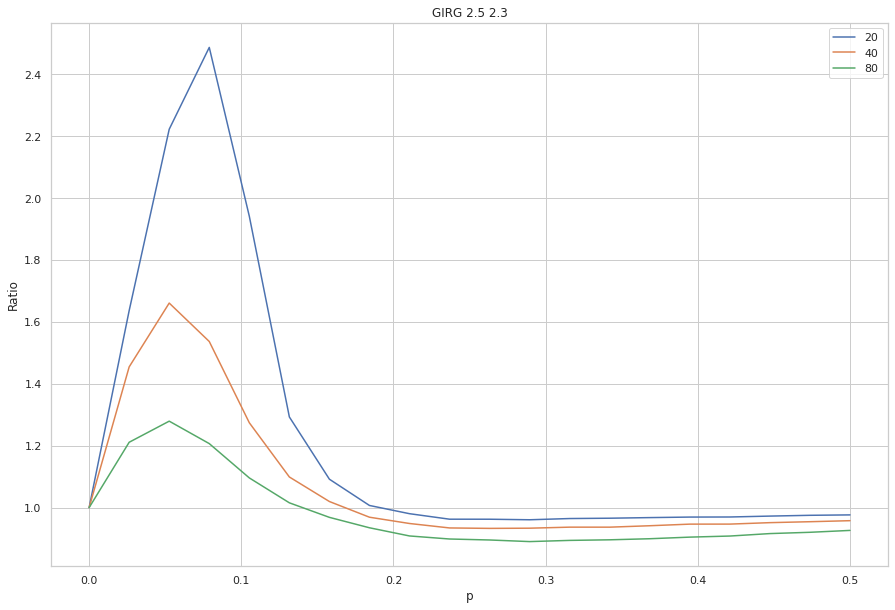

Graph size:  2094
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1379833[ms]
>>> Reading input time = 56287[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1388821[ms]
>>> Reading input time = 56182[ms]
[Python] Error: None


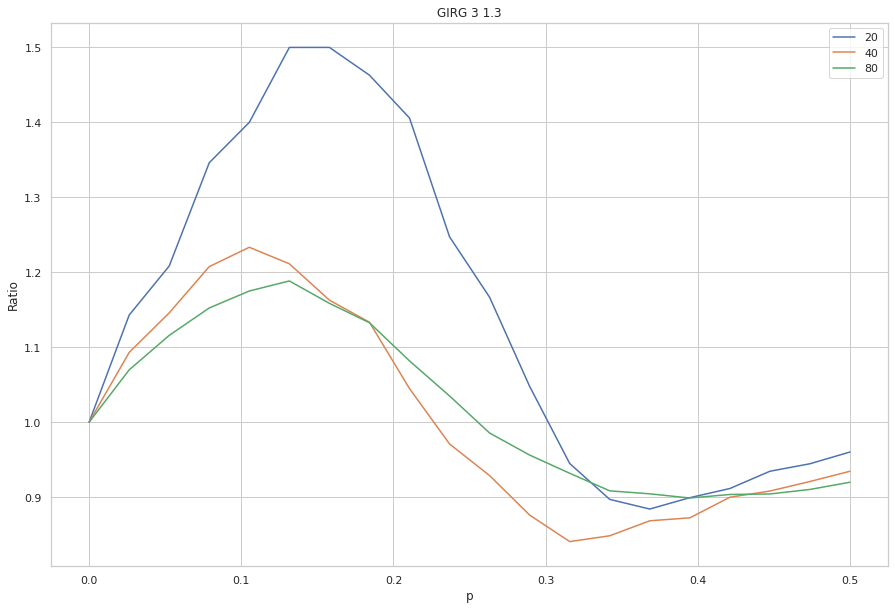

Graph size:  2175
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1371997[ms]
>>> Reading input time = 56300[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1454053[ms]
>>> Reading input time = 56986[ms]
[Python] Error: None


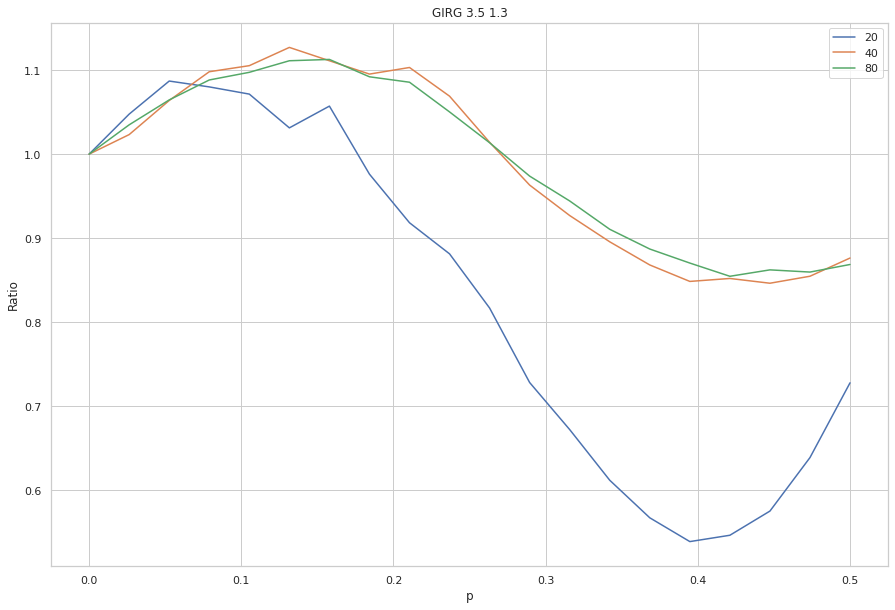

Graph size:  1254
Network 9
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1437779[ms]
>>> Reading input time = 54418[ms]
[Python] Error: None
>>> Params: p=0 seed=0 verbose=False sim_num: 1000
>>> GPU: TITAN V with 80 SMs and 2048 mTpSM (1455.0 MHz and 850.0 MHz)
>>> Init time = 1395322[ms]
>>> Reading input time = 54257[ms]
[Python] Error: None


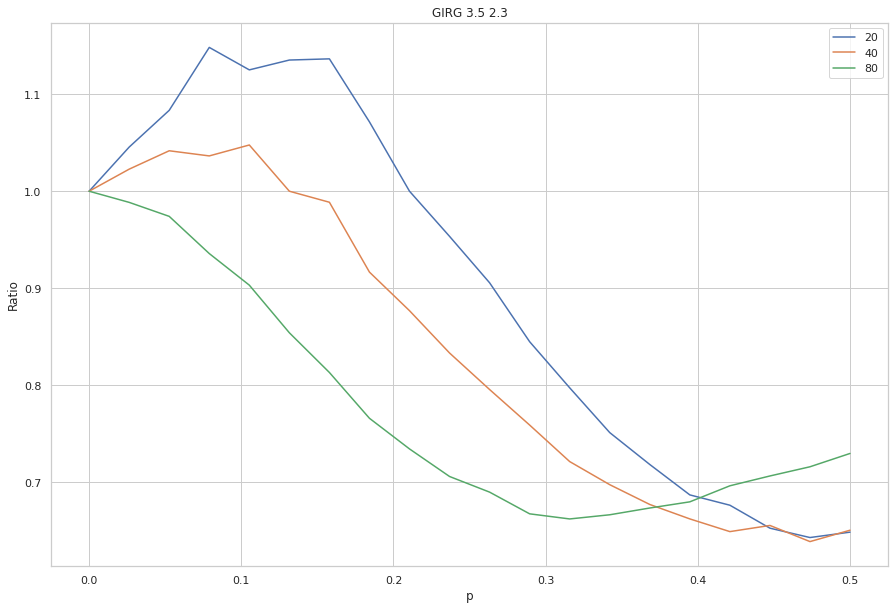

In [22]:
inp_args["--sim_num"]=1000

seed = 0
for config in [True, False]:
    for GIRG_args in [GIRG_args1 ,GIRG_args2, GIRG_args3, GIRG_args4]:
        GIRG_args["config_model"]=config
        GIRG_args["random_seed"]=seed
        GIRG_args["N"]=3000
        tau = GIRG_args["tau"]
        alpha = GIRG_args["alpha"]

        graph = init_graph(GIRG_args)

        centrum = get_centrum(graph, "k-core", len(graph))

        ss = [20,40,80]

        run_percolation(graph, centrum, ss, np.linspace(0,0.5, 20))
        plot_percolation(ss, "Config {} {}".format(tau, alpha) if config else "GIRG {} {}".format(tau, alpha))
        plt.show()